### Company Data

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Kaushik-Varma/linear_regression_model_python/main/Company_data.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### Reading and Understanding the data

In [2]:
print("Shape of the data")
print(df.shape)
print("Info")
print(df.info())
print("description")
print(df.describe())

Shape of the data
(200, 4)
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
description
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


### Visualizing the data

In [3]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


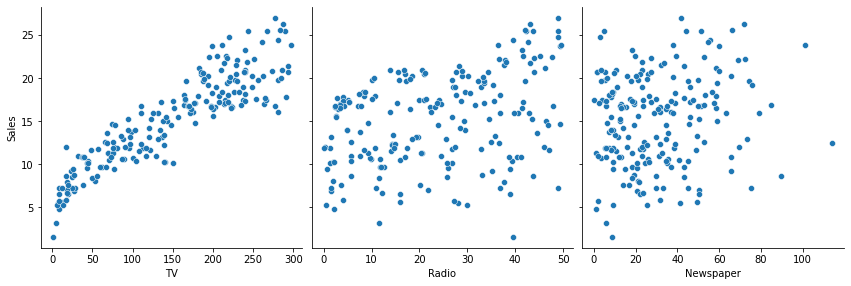

In [4]:
#importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", height=4, aspect=1, kind="scatter")
plt.show()

#### Here we can observe that the graph is more scattered in case of radio and newspaper as compared to TV

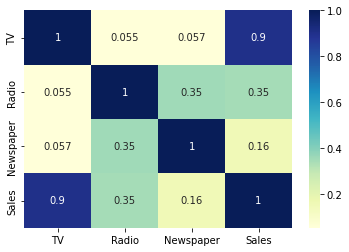

In [5]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### We can observe that the TV column is more correlated with sales. Any value close to -1.0 or 1.0 is termed as highly correlated

### Performing Simple Linear Regression

#### Creating Train and Test Datasets

In [6]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [7]:
#Here we are training and testing our model on the basis of TV and sales
X = df["TV"]
y = df["Sales"]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [9]:
print("X training data set")
print(X_train)
print("Y training data set")
print(y_train)

X training data set
74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64
Y training data set
74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64


In [10]:
print(len(X_train), len(y_test))

140 60


In [11]:

#By default, the statsmodel library fits a line that passes through the origin. But if we observe the simple linear regression equation y = c + mX, it has an intercept value as c. So, to have an intercept, we need to add the add_constant attribute manually.


In [12]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [13]:
import statsmodels.api as sm
print("Before adding the constant")
print(X_train)
print("After adding the constant")
X_train_sm = sm.add_constant(X_train)
X_train_sm

Before adding the constant
74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64
After adding the constant


,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


#### A const row with constant value 1.0 has been added to the X_train data set

In [14]:
model = sm.OLS(y_train, X_train_sm).fit()
model.params

const    6.948683
TV       0.054546
dtype: float64

#### Y = c + mx, c = 6.948683 m = 0.054546

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.52e-52
Time:                        08:58:04   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### R squared value = 0.816
##### This means 81.6% (0.816 * 100) Sales variance can be related with TV columns using this line.
##### P-value of constant is zero (or partially zero) means it is satistically significant

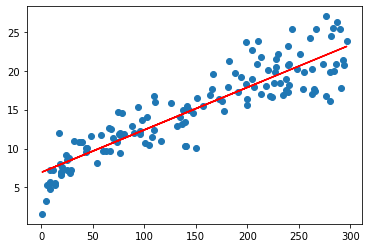

In [16]:
#plotting the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948683 + 0.054546 * X_train, "r")
plt.show()

### Residual Analysis

In [17]:
#predicting the y_values using the x_train_sm
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [18]:
y_train_pred = model.predict(X_train_sm)
print("Predicted Data")
print(y_train_pred)
print("Y train")
print(y_train)

Predicted Data
74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64
Y train
74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64


In [19]:
res = y_train - y_train_pred
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

<Figure size 432x288 with 0 Axes>

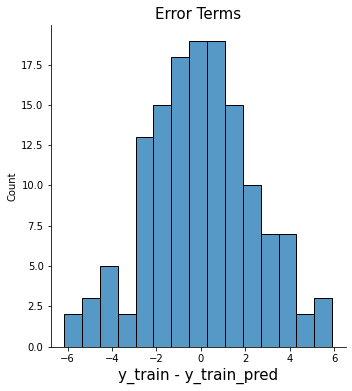

In [20]:
#graphical representation of res
fig = plt.figure()
sns.displot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

#### Mean of residual graph is 0, it's not following any specific pattern

[]

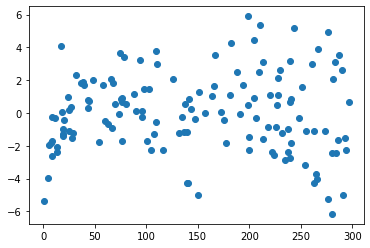

In [21]:
plt.scatter(X_train, res)
plt.plot()

### Prediction on the Test Data or Evaluating the Model

In [22]:
#Adding the constant column of value 1.0
X_test_sm = sm.add_constant(X_test)
print(X_test_sm)
print("Length", len(X_test_sm))

     const     TV
126    1.0    7.8
104    1.0  238.2
99     1.0  135.2
92     1.0  217.7
111    1.0  241.7
167    1.0  206.8
116    1.0  139.2
96     1.0  197.6
52     1.0  216.4
69     1.0  216.8
164    1.0  117.2
124    1.0  229.5
182    1.0   56.2
154    1.0  187.8
125    1.0   87.2
196    1.0   94.2
194    1.0  149.7
177    1.0  170.2
163    1.0  163.5
31     1.0  112.9
11     1.0  214.7
73     1.0  129.4
15     1.0  195.4
41     1.0  177.0
97     1.0  184.9
128    1.0  220.3
133    1.0  219.8
82     1.0   75.3
139    1.0  184.9
123    1.0  123.1
83     1.0   68.4
65     1.0   69.0
151    1.0  121.0
162    1.0  188.4
170    1.0   50.0
77     1.0  120.5
32     1.0   97.2
173    1.0  168.4
174    1.0  222.4
85     1.0  193.2
168    1.0  215.4
112    1.0  175.7
171    1.0  164.5
181    1.0  218.5
7      1.0  120.2
46     1.0   89.7
75     1.0   16.9
28     1.0  248.8
29     1.0   70.6
195    1.0   38.2
40     1.0  202.5
153    1.0  171.3
115    1.0   75.1
64     1.0  131.1
59     1.0

In [23]:
y_test_pred = model.predict(X_test_sm)
print("Predicted Y value")
y_test_pred

Predicted Y value


126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

In [24]:
#calculating the R^2 Value
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.792103160124566